In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import rotate_axes
from setuptools.command.rotate import rotate
#pd.options.display.max_rows = 10

In [2]:
data = pd.read_csv("USAID_Anticorruption_Projects_Database.csv")
data

,uuid,region,country,proj_nm,st_date,end_date,awd_amount,awd_value,implementer,sector,...,rfp_rftop,final_res,mind_eval,final_eval,audit,interim_rep,addl_docs,addl_info,corruption,stability
0,1,South and Central Asia (SCA),Afghanistan,Assistance for Afghanistan's Anti-Corruption A...,2010,2013,e) $25 M-$50 M,26642989,Management Systems International (MSI),"Independent Agencies, Civil Society",...,NaN,http://pdf.usaid.gov/pdf_docs/PA00JP3T.pdf,NaN,NaN,NaN,NaN,http://www.msiworldwide.com/project/supporting...,NaN,High Corruption,Unstable
1,2,South and Central Asia (SCA),Afghanistan,Rule of Law Stabilization Program - Formal Com...,2010,2012,e) $25 M-$50 M,33700000,TetraTech ARD,Rule of Law,...,NaN,NaN,NaN,http://pdf.usaid.gov/pdf_docs/PDACU496.pdf,NaN,NaN,NaN,NaN,Very High Corruption,Very Unstable
2,3,South and Central Asia (SCA),Afghanistan,Afghanistan Rule of Law Stabilization Project ...,2011,2012,c) $5 M-$10 M,10000000,"Checchi and Company Consulting, Inc.",Rule of Law,...,NaN,http://pdf.usaid.gov/pdf_docs/PDACY340.pdf,NaN,http://pdf.usaid.gov/pdf_docs/PDACW029.pdf,NaN,NaN,http://www.checchiconsulting.com/index.php?opt...,NaN,Very High Corruption,Very Unstable
3,4,South and Central Asia (SCA),Afghanistan,Political Party Assessment,2012,2012,a) <$1 M,NaN,"Checchi and Company Consulting, Inc.",Elections and Political Processes,...,NaN,http://pdf.usaid.gov/pdf_docs/PNADZ833.pdf,NaN,NaN,NaN,NaN,NaN,NaN,Very High Corruption,Very Unstable
4,30,Europe and Eurasia (E&E),Albania,Justice Sector Strengthening Project (JuST),2010,2015,c) $5 M-$10 M,9012613,Chemonics,"Rule of Law, Civil Society",...,https://www.fbo.gov/index?s=opportunity&mode=f...,NaN,NaN,NaN,NaN,http://pdf.usaid.gov/pdf_docs/PA00HWM1.pdf,NaN,NaN,High Corruption,Unstable
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,311,Middle East and North Africa (MENA),Yemen,Responsive Governance Project (RGP),2010,2015,e) $25 M-$50 M,43000000,Counterpart International,"Civil Society, Legislature",...,NaN,NaN,http://pdf.usaid.gov/pdf_docs/pdacu527.pdf,NaN,NaN,NaN,NaN,http://www.counterpart.org/our-work/projects/r...,High Corruption,Very Unstable
311,312,Middle East and North Africa (MENA),Yemen,Enhancing Government Effectiveness Project (EGE),2007,2010,b) $1 M-$5 M,2939048,Management Systems International (MSI),Governance,...,NaN,NaN,NaN,NaN,NaN,NaN,http://www.msiworldwide.com/project/yemen-fund...,http://msiworldwide.wordpress.com/tag/yemen/,High Corruption,Very Unstable
312,313,Middle East and North Africa (MENA),Yemen,Basic Health Services Project (BHS),2006,2010,d) $10 M-$25 M,21610314.78,Pathfinder International,"Healthcare, Governance",...,NaN,http://pdf.usaid.gov/pdf_docs/PDACW754.pdf,http://pdf.usaid.gov/pdf_docs/PDACP460.pdf,NaN,NaN,NaN,NaN,NaN,High Corruption,Very Unstable
313,314,Sub-Saharan Africa (SSA),Zambia,Zambia Threshold Project (ZTP),2006,2008,d) $10 M-$25 M,22735000,Chemonics,"Rule of Law, Private Sector",...,NaN,http://pdf.usaid.gov/pdf_docs/PDACL989.pdf,NaN,NaN,NaN,NaN,http://www.mcc.gov/pages/countries/program/zam...,http://www.mcc.gov/documents/reports/content-r...,High Corruption,Unstable


In [3]:
cleaned_award_values = pd.to_numeric(data['awd_value'].str.replace(',', ''))
print(f'{cleaned_award_values.mean():.0f}')
#to_numeric to convert from str to int.
#removes commas because we can compute 1000 not 1,000
#then find mean

23545699


<h4>For the given records, after cleaning we conclude a mean award value per project to be 23,545,699 or $23.5M</h4>

In [4]:
pd.set_option('display.float_format', '{:.0f}'.format) #convert scientific notation into decimal
cleaned_award_values.describe()

count         261
mean     23545699
std      45475478
min        102600
25%       5000000
50%       9887473
75%      20685000
max     370000000
Name: awd_value, dtype: float64

<Axes: ylabel='region'>

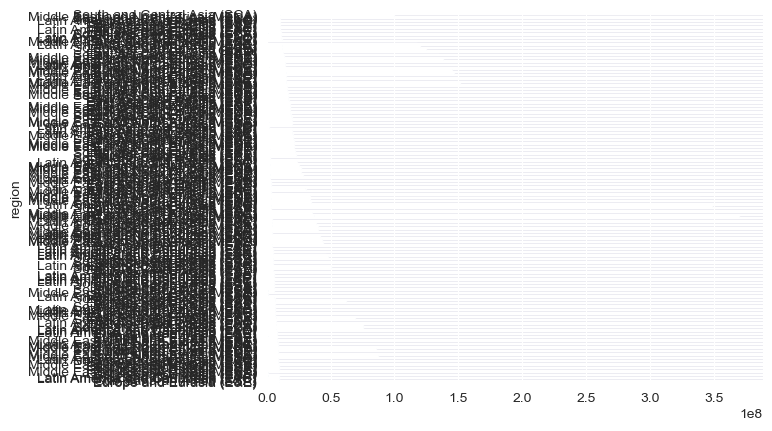

In [26]:
x.plot.barh()

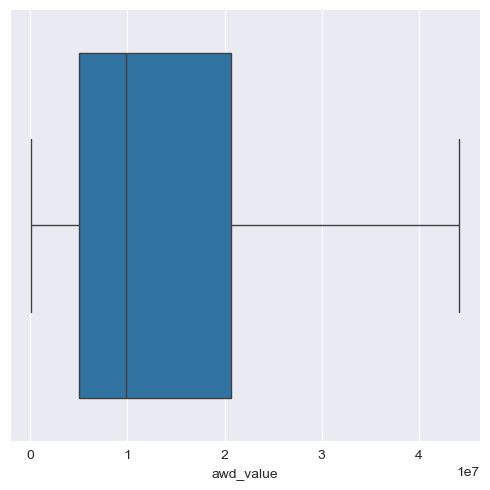

In [7]:
import seaborn as sns
sns.catplot(kind='box', data=x,orient='h', showfliers=False)

<Axes: title={'center': 'Average Award Amount per Project in Each Region'}, ylabel='region'>

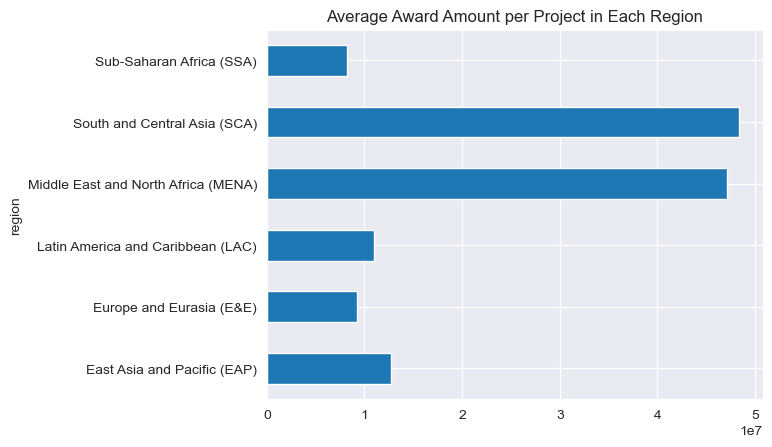

In [6]:
x=data.set_index('region')['awd_value']
x=x.dropna()
x=x.sort_values(ascending=False)
x=pd.to_numeric(x.str.replace(',', ''))
v=x.groupby('region').mean()
v=v.drop('Global') #global is a major outlier and does not fit because it is not a region
v=v.astype(int)
v
v.plot.barh(title='Average Award Amount per Project in Each Region')
#plt.show()
#x.plot()

In [9]:
v

region
East Asia and Pacific (EAP)            12728152
Europe and Eurasia (E&E)                9271119
Latin America and Caribbean (LAC)      10951592
Middle East and North Africa (MENA)    47163841
South and Central Asia (SCA)           48362881
Sub-Saharan Africa (SSA)                8240824
Name: awd_value, dtype: int64

In [10]:
v.idxmax()

'South and Central Asia (SCA)'

In [11]:
count = {}
for i in data['intervention_type']:
    if i in count:
        count[i] += 1
    else:
        count[i] = 1
df = pd.Series(count)
df.sort_values(ascending=False).head(10)

Transparency, Accountability                   72
Awareness, Participation                       35
Transparency, Accountability, Participation    19
Assessment                                     18
Transparency, Participation                    15
Transparency, Awareness                        14
Transparency, Accountability, Awareness        13
Accountability, Participation                  13
Accountability                                 12
Participation                                  11
dtype: int64

In [12]:
#I used this to identify what caused an error mentioning float types existed for the question below
for it in data['intervention_type']:
    if isinstance(it,float):
        print(it)

nan
nan


In [13]:
count2 = {}
clean_intervention_type = data['intervention_type'].dropna() #remove nan to only handle strings
for it in clean_intervention_type:
    it=it.split(',') #each iteration looks like 'Awareness, Participation' so we use this to split it
    for z in it: #counting loop
        z=z.strip() #strip to clean
        if z in count2:
            count2[z] += 1
        else:
            count2[z] = 1
itdf = pd.Series(count2) #takes dictionary to series
itdf_sorted = itdf.sort_values(ascending=False).head(5) #sorts to view most used intervention
itdf_sorted

Transparency      187
Accountability    177
Participation     129
Awareness         101
Enforcement        42
dtype: int64

<Axes: title={'center': 'Top Intervention Types Used'}, xlabel='# of Times Intervention was Used'>

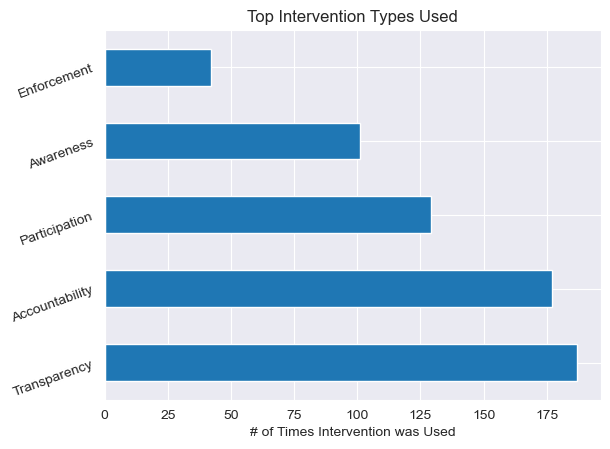

In [14]:
itdf_sorted.plot.barh(title='Top Intervention Types Used', xlabel = '# of Times Intervention was Used',rot=20)

<h4>We now see that the most common intervention types are Transparency, Accountability, Participation, and Awareness</h4>

<h4>Now we look for what sector(s) are most problematic</h4>

In [15]:
for it in data['sector']:
    if isinstance(it,str):
        pass
    else:
        print(it)
#because there is no output we've confirmed with this that there should be no errors like last time

In [16]:
sector_count = {}
for sector_row in data['sector']:
    sector_row=sector_row.split(',') #each iteration looks like 'Local Government, Civil Society' so we use this to split it
    for sector in sector_row: #counting loop
        sector=sector.strip() #strip to clean
        if sector in sector_count:
            sector_count[sector] += 1
        else:
            sector_count[sector] = 1
srdf = pd.Series(sector_count) #takes dictionary to series
srdf_sorted = srdf.sort_values(ascending=False).head(10) #sorts to view most used intervention shows top 10
srdf_sorted

Civil Society           132
Rule of Law             104
Local Government        100
Public Finance           48
Governance               36
Economic Growth          35
Legislature              25
Independent Agencies     21
Media                    20
Healthcare               13
dtype: int64

<Axes: title={'center': 'Top Sector focus in Anti-Corruption Projects (according to sample)'}, xlabel='# of Times Sector was a Focus'>

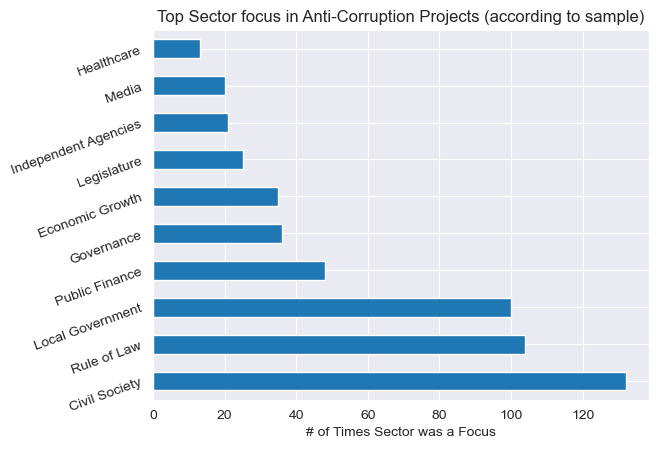

In [17]:
srdf_sorted.plot.barh(title = 'Top Sector focus in Anti-Corruption Projects (according to sample)',xlabel = '# of Times Sector was a Focus',rot=20)

## Distributions

In [18]:
data[data['end_date'] != '-'].head()

,uuid,region,country,proj_nm,st_date,end_date,awd_amount,awd_value,implementer,sector,...,rfp_rftop,final_res,mind_eval,final_eval,audit,interim_rep,addl_docs,addl_info,corruption,stability
0,1,South and Central Asia (SCA),Afghanistan,Assistance for Afghanistan's Anti-Corruption A...,2010,2013,e) $25 M-$50 M,26642989,Management Systems International (MSI),"Independent Agencies, Civil Society",...,NaN,http://pdf.usaid.gov/pdf_docs/PA00JP3T.pdf,NaN,NaN,NaN,NaN,http://www.msiworldwide.com/project/supporting...,NaN,High Corruption,Unstable
1,2,South and Central Asia (SCA),Afghanistan,Rule of Law Stabilization Program - Formal Com...,2010,2012,e) $25 M-$50 M,33700000,TetraTech ARD,Rule of Law,...,NaN,NaN,NaN,http://pdf.usaid.gov/pdf_docs/PDACU496.pdf,NaN,NaN,NaN,NaN,Very High Corruption,Very Unstable
2,3,South and Central Asia (SCA),Afghanistan,Afghanistan Rule of Law Stabilization Project ...,2011,2012,c) $5 M-$10 M,10000000,"Checchi and Company Consulting, Inc.",Rule of Law,...,NaN,http://pdf.usaid.gov/pdf_docs/PDACY340.pdf,NaN,http://pdf.usaid.gov/pdf_docs/PDACW029.pdf,NaN,NaN,http://www.checchiconsulting.com/index.php?opt...,NaN,Very High Corruption,Very Unstable
3,4,South and Central Asia (SCA),Afghanistan,Political Party Assessment,2012,2012,a) <$1 M,NaN,"Checchi and Company Consulting, Inc.",Elections and Political Processes,...,NaN,http://pdf.usaid.gov/pdf_docs/PNADZ833.pdf,NaN,NaN,NaN,NaN,NaN,NaN,Very High Corruption,Very Unstable
4,30,Europe and Eurasia (E&E),Albania,Justice Sector Strengthening Project (JuST),2010,2015,c) $5 M-$10 M,9012613,Chemonics,"Rule of Law, Civil Society",...,https://www.fbo.gov/index?s=opportunity&mode=f...,NaN,NaN,NaN,NaN,http://pdf.usaid.gov/pdf_docs/PA00HWM1.pdf,NaN,NaN,High Corruption,Unstable


In [20]:
data.shape

(315, 24)

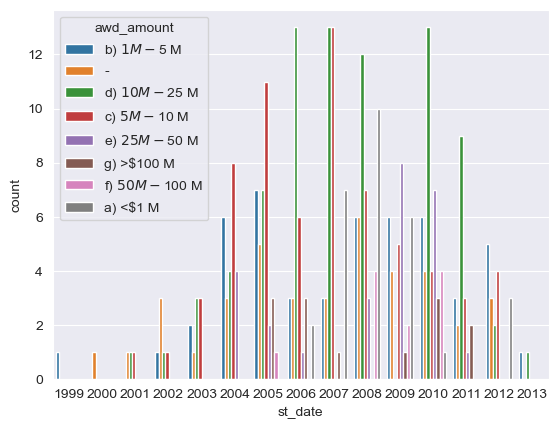

In [21]:
sns.countplot(
    data=data[data['end_date'] != '-'].sort_values(by='end_date', ascending=True),
    x='st_date',
    hue='awd_amount'
)
plt.show()


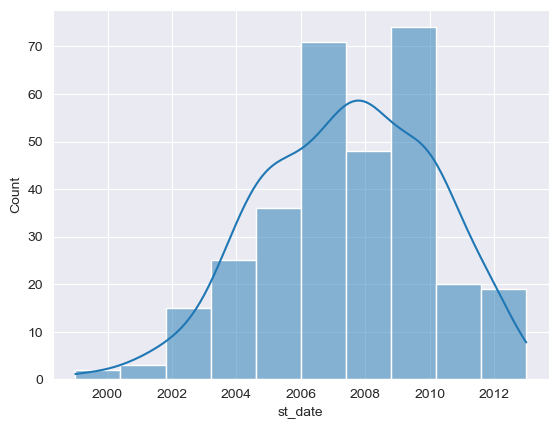

In [22]:
sns.histplot(
    data=data[data['end_date'] != '-'].sort_values(by='end_date', ascending=True),
    x='st_date',
    kde=True,
)
plt.show()


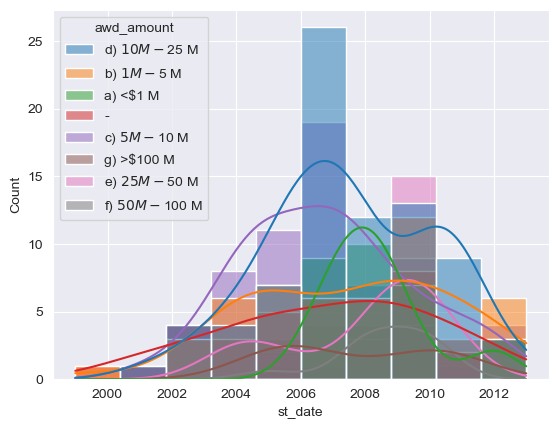

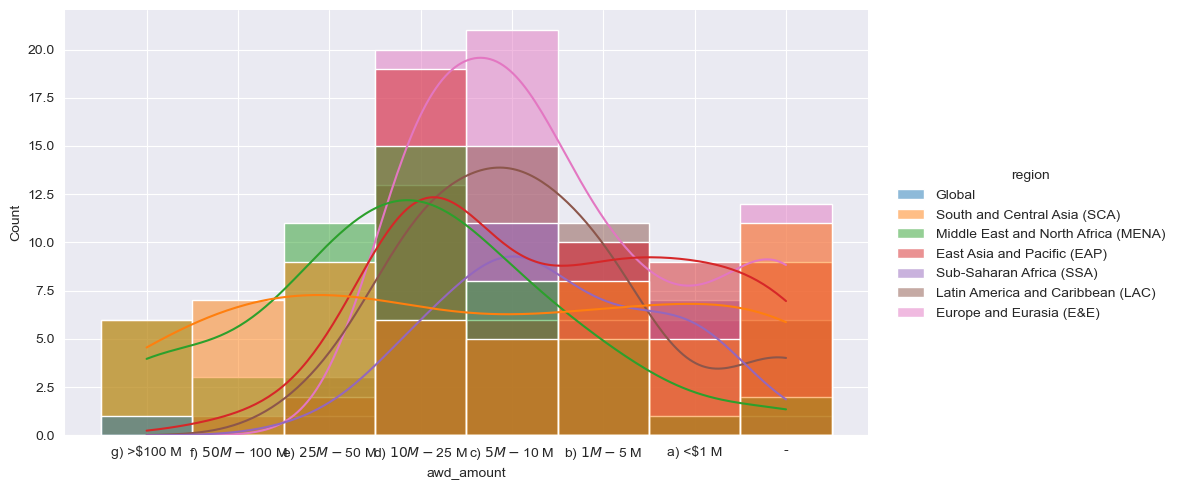

In [24]:
import seaborn as sns

sns.histplot(
    data=data[data['end_date'] != '-'].sort_values(by='end_date', ascending=True),
    x='st_date',
    kde=True,
    hue='awd_amount'
)
plt.show()

sns.displot(data.sort_values(by='awd_amount',ascending=False), x='awd_amount', hue='region', aspect=1.8,kde=True)
plt.show()

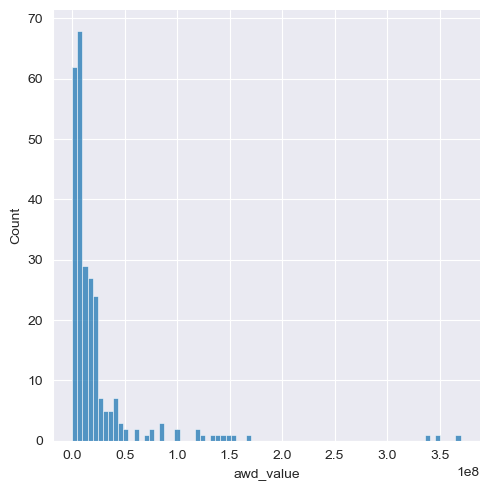

In [25]:
data['awd_value'] = pd.to_numeric(data['awd_value'].str.replace(',', ''))
sns.displot(data, x='awd_value')
plt.show()